<h1 align=center>Aprendizado por Reforço para Tomada de Decisão em Ambientes Complexos</h1>

<p align=center><img src=https://i0.wp.com/www.datageeks.com.br/wp-content/uploads/2019/06/Aprendizagem-por-Refor%C3%A7o.jpg?resize=350%2C350&ssl=1></p>

Anteriomente, focamos no aprendizado de máquina supervisionado e não supervisionado. Também aprendemos como aproveitar as redes neurais artificiais e o aprendizado profundo para lidar com os problemas encontrados com esses tipos de aprendizado de máquina. Como você deve se lembrar, o aprendizado supervisionado se concentra em prever um rótulo de categoria ou valor contínuo de um determinado vetor de recursos de entrada. O aprendizado não supervisionado se concentra na extração de padrões de dados, tornando-o útil para compactação de dados, clustering ou aproximando a distribuição do conjunto de treinamento para gerar novos dados.

Agora, voltamos nossa atenção para uma categoria separada de aprendizado de máquina, aprendizado por reforço (RL), que é diferente das categorias anteriores, pois se concentra em aprender uma série de ações para otimizar uma recompensa geral - por exemplo, vencer em um jogo de xadrez. Em resumo, abordaremos os seguintes tópicos:
* Aprender os conceitos básicos de RL, familiarizar-se com as interações agente/ambiente e entender como funciona o processo de recompensa, a fim de ajudar a tomar decisões em ambientes complexos
* Apresentando diferentes categorias de problemas de RL, tarefas de aprendizado baseadas em modelo e sem modelo, Monte Carlo e algoritmos de aprendizado de diferença temporal
* Implementação de um algoritmo de Q-learning em formato tabular
* Compreender a aproximação de função para resolver problemas de RL e combinar RL com aprendizado profundo através da implementação de um algoritmo Q-learning profundo

RL é uma área de pesquisa complexa e vasta, e este módulo se concentrará nos fundamentos. Como este módulo serve como uma introdução, e para manter nossa atenção nos métodos e algoritmos importantes, trabalharemos principalmente com exemplos básicos que ilustram os principais conceitos. No entanto, no final deste módulo, examinaremos um exemplo mais desafiador e utilizaremos arquiteturas de aprendizado profundo para uma abordagem de RL específica, conhecida como Q-learning profundo.

### Introdução – aprendendo com a experiência
Nesta seção, apresentaremos primeiro o conceito de RL como um ramo do aprendizado de máquina e veremos suas principais diferenças em comparação com outras tarefas de aprendizado de máquina. Depois disso, abordaremos os componentes fundamentais de um sistema RL. Em seguida, veremos a formulação matemática RL baseada no processo de decisão de Markov.

### Entendendo o aprendizado por reforço
Até este ponto, este material se concentrou principalmente no aprendizado *supervisionado* e *não supervisionado*. Lembre-se de que no aprendizado *supervisionado*, contamos com exemplos de treinamento rotulados, fornecidos por um supervisor ou um especialista humano, e o objetivo é treinar um modelo que possa generalizar bem para exemplos de teste não rotulados e não vistos. Isso significa que o modelo de aprendizado supervisionado deve aprender a atribuir os mesmos rótulos ou valores a um determinado exemplo de entrada que o especialista humano supervisor. Por outro lado, no aprendizado não supervisionado, o objetivo é aprender ou capturar a estrutura subjacente de um conjunto de dados, como em métodos de agrupamento e redução de dimensionalidade; ou aprender a gerar novos exemplos de treinamento sintéticos com uma distribuição subjacente semelhante. O RL é substancialmente diferente do aprendizado supervisionado e não supervisionado e, portanto, o RL é frequentemente considerado a "terceira categoria de aprendizado de máquina".

O elemento chave que distingue o RL de outras subtarefas de aprendizado de máquina, como aprendizado supervisionado e não supervisionado, é que o RL está centrado no conceito de **aprendizado por interação**. Isso significa que em RL, o modelo aprende com as interações com um ambiente para maximizar uma **função de recompensa.**

Embora a maximização de uma função de recompensa esteja relacionada ao conceito de minimizar a função de custo no aprendizado supervisionado, os rótulos *corretos* para aprender uma série de ações não são conhecidos ou definidos antecipadamente em RL - em vez disso, eles precisam ser aprendidos por meio de interações com o ambiente, a fim de alcançar um determinado resultado desejado - como vencer em um jogo. Com o RL, o modelo (também chamado de **agente**) interage com seu ambiente e, ao fazê-lo, gera uma sequência de interações que, em conjunto, são chamadas de **episódio**. Por meio dessas interações, o agente coleta uma série de recompensas determinadas pelo ambiente. Essas recompensas podem ser positivas ou negativas e, às vezes, não são divulgadas ao agente até o final de um episódio.

Por exemplo, imagine que queremos ensinar um computador a jogar xadrez e vencer jogadores humanos. Os rótulos (recompensas) para cada movimento individual de xadrez feito pelo computador não são conhecidos até o final do jogo, porque durante o jogo em si, não sabemos se um movimento específico resultará em ganhar ou perder esse jogo. Apenas no final do jogo o feedback é determinado. Esse feedback provavelmente seria uma recompensa positiva dada se o computador ganhasse o jogo, porque o agente havia alcançado o resultado geral desejado; e vice-versa, uma recompensa negativa provavelmente seria dada se o computador tivesse perdido o jogo. 

Além disso, considerando o exemplo de jogar xadrez, a entrada é a configuração atual, por exemplo, a disposição das peças individuais de xadrez no tabuleiro. Dado o grande número de entradas possíveis (os estados do sistema), é impossível rotular cada configuração ou estado como positivo ou negativo. Portanto, para definir um processo de aprendizado, fornecemos recompensas (ou penalidades) ao final de cada jogo, quando sabemos se atingimos o resultado desejado – se vencemos ou não o jogo.

Esta é a essência do RL. Em RL, não podemos ou não ensinamos a um agente, computador ou robô, como fazer as coisas; podemos apenas especificar o que queremos que o agente alcance. Então, com base no resultado de um teste específico, podemos determinar recompensas dependendo do sucesso ou fracasso do agente. Isso torna a RL muito atraente para a tomada de decisões em ambientes complexos – especialmente quando a tarefa de resolução de problemas requer uma série de etapas, que são desconhecidas, difíceis de explicar ou definir. Além de aplicações em jogos e robótica, exemplos de RL também podem ser encontrados na natureza. Por exemplo, treinar um cão envolve RL – nós entregamos recompensas (guloseimas) ao cão quando ele realiza certas ações desejáveis. Ou considere um cão médico treinado para avisar seu parceiro de uma convulsão que se aproxima. Neste caso, não sabemos o mecanismo exato pelo qual o cão é capaz de detectar uma convulsão que se aproxima, e certamente não poderíamos definir uma série de etapas para aprender a detecção de convulsões, mesmo que tivéssemos conhecimento preciso disso. mecanismo. No entanto, podemos recompensar o cão com um petisco se ele detectar com sucesso uma convulsão para reforçar esse comportamento!

Embora a RL forneça uma estrutura poderosa para aprender uma série arbitrária de ações, para atingir um determinado objetivo, lembre-se de que a RL ainda é uma área de pesquisa relativamente jovem e ativa com muitos desafios não resolvidos. Um aspecto que torna o treinamento de modelos de RL particularmente desafiador é que as entradas do modelo consequentes dependem de ações realizadas anteriormente. Isso pode levar a todos os tipos de problemas e geralmente resulta em comportamento de aprendizagem instável. Além disso, essa dependência de sequência em RL cria o chamado **efeito retardado**, o que significa que a ação realizada em um passo de tempo `t` pode resultar em uma recompensa futura aparecendo em um número arbitrário de passos depois.

### Definindo a interface agente-ambiente de um sistema de aprendizado por reforço
Em todos os exemplos de RL, podemos encontrar duas entidades distintas: um agente e um ambiente. Formalmente, um **agente** é definido como uma entidade que aprende a tomar decisões e interage com o ambiente ao seu redor por meio de uma ação. Em troca, como consequência de uma ação, o agente recebe observações e um sinal de recompensa conforme governado pelo ambiente. O **ambiente** é qualquer coisa que esteja fora do agente. O ambiente se comunica com o agente e determina o sinal de recompensa para a ação do agente, bem como suas observações.

O **sinal de recompensa** é o feedback que o agente recebe da interação com o ambiente, que geralmente é fornecido na forma de um valor escalar e pode ser positivo ou negativo. O objetivo da recompensa é dizer ao agente o quão bem ele se saiu. A frequência com que o agente recebe a recompensa depende da tarefa ou problema em questão. Por exemplo, no jogo de xadrez, a recompensa seria determinada após uma partida completa com base no resultado de todas as jogadas: uma vitória ou uma derrota. Por outro lado, poderíamos definir um labirinto tal que a recompensa seja determinada após cada passo de tempo. Nesse labirinto, o agente tenta maximizar suas recompensas acumuladas ao longo de sua vida – onde a vida descreve a duração de um episódio.

O diagrama a seguir ilustra as interações e a comunicação entre o agente e o ambiente:

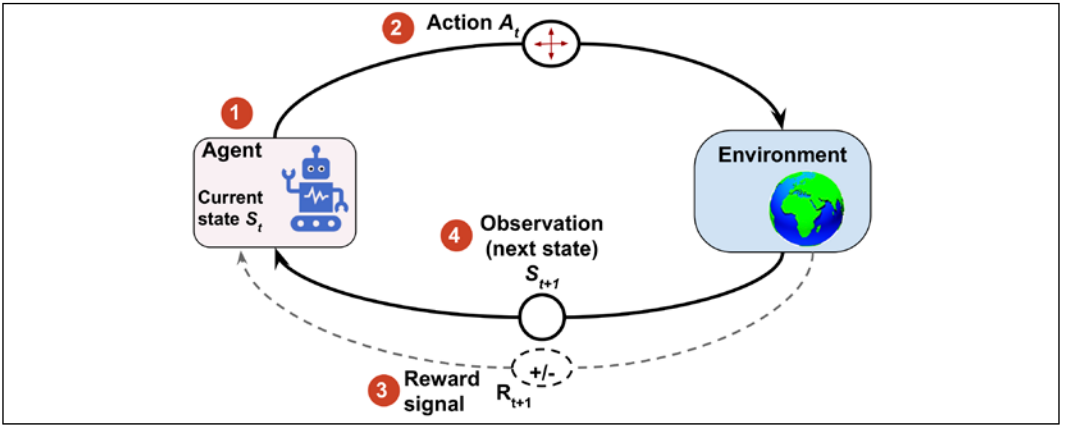

In [3]:
from IPython.display import Image
Image('imagens\RL_Diagrama.PNG')

O estado do agente, conforme ilustrado na figura anterior, é o conjunto de todas as suas variáveis ​​(1). Por exemplo, no caso de um drone robô, essas variáveis ​​podem incluir a posição atual do drone (longitude, latitude e altitude), a vida útil restante da bateria do drone, a velocidade de cada ventoinha e assim por diante. A cada passo de tempo, o agente interage com o ambiente através de um conjunto de ações disponíveis $\small A_t$ (2). Com base na ação realizada pelo agente denotada por $\small A_t$, enquanto estiver no estado $\small S_t$, o agente receberá um sinal de recompensa $\small R_{t+ 1}$(3), e seu estado se tornará $\small S_{t+1}$ (4).

Durante o processo de aprendizagem, o agente deve tentar diferentes ações (**exploration**), para que possa aprender progressivamente quais ações prefere e realizar com mais frequência (**exploitation**) a fim de maximizar a recompensa total e cumulativa. Para entender esse conceito, vamos considerar um exemplo muito simples em que um recém-formado em ciência da computação com foco em engenharia de software está se perguntando se deve começar a trabalhar em uma empresa (exploitation) ou fazer um mestrado ou doutorado para aprender mais sobre ciência de dados e aprendizado de máquina (exploration). Em geral, a exploitation resultará na escolha de ações com uma recompensa maior no curto prazo, enquanto a exploration pode resultar em recompensas totais maiores no longo prazo. O *tradeoff* entre *exploitation* e *exploration* tem sido estudado extensivamente e, no entanto, não há uma resposta universal para esse dilema de tomada de decisão.

### Os fundamentos teóricos da RL 

Antes de pularmos para alguns exemplos práticos e começarmos a treinar um modelo de RL, o que faremos mais adiante neste componente, vamos primeiro entender alguns dos fundamentos teóricos da RL. As seções a seguir começarão examinando primeiro a formulação matemática dos **processos de decisão de Markov**, tarefas episódicas versus tarefas contínuas, algumas terminologias-chave de RL e programação dinâmica usando a **equação de Bellman**. Vamos começar com os processos de decisão de Markov.

### Processos de decisão de Markov
Em geral, os tipos de problemas com os quais a RL lida são normalmente formulados como **processos de decisão de Markov (MDPs)**. A abordagem padrão para resolver problemas de MDP é usando programação dinâmica, mas a RL oferece algumas vantagens importantes sobre a programação dinâmica.

> ##### Programaçao dinâmica
> A programação dinâmica refere-se a um conjunto de algoritmos de computador e métodos de programação que foi desenvolvido por Richard Bellman na década de 1950. Em certo sentido, a programação dinâmica é sobre a resolução de problemas recursivos – resolvendo problemas relativamente complicados dividindo-os em subproblemas menores.
>
> A principal diferença entre recursão e programação dinâmica é que a programação dinâmica armazena os resultados dos subproblemas (geralmente como um dicionário ou outra forma de tabela de consulta) para que possam ser acessados ​​em tempo constante (em vez de recalculá-los) se forem encontrados novamente em futuro.
>
> Exemplos de alguns problemas famosos em ciência da computação que são resolvidos por programação dinâmica incluem alinhamento de sequência e cálculo do caminho mais curto do ponto A ao ponto B.

A programação dinâmica não é uma abordagem viável, no entanto, quando o tamanho dos estados (ou seja, o número de configurações possíveis) é relativamente grande. Nesses casos, a RL é considerada uma abordagem alternativa muito mais eficiente e prática para resolver MDPs.

### A formulação matemática dos processos de decisão de Markov
Os tipos de problemas que requerem o aprendizado de um processo de tomada de decisão interativo e sequencial, onde a decisão no passo de tempo **t** afeta as situações subsequentes, são formalizados matematicamente como processos de decisão de Markov (MDPs).

No caso das interações agente/ambiente em RL, se denotarmos o estado inicial do agente como $\small S_0$, as interações entre o agente e o ambiente resultam em uma sequência da seguinte forma:
$$
\small \{S_0,A_0,R_1\}, \{S_1,A_1,R_2\}, \{S_2,A_2,R_31\}, \cdots
$$

Observe que as chaves servem apenas como auxílio visual. Aqui, $\small S_t$ e $\small A_t$ representam o estado e a ação realizada no passo de tempo *t*. $\small R_{t+1}$ denota a recompensa recebida do ambiente após realizar a ação $\small A_t$. Observe que $\small S_t$, $\small R_{t+1}$ e $\small A_t$ são variáveis ​​aleatórias dependentes do tempo que tiram valores de conjuntos finitos predefinidos denotados por $\small s \in \hat{S}$, $\small r \in \hat{R}$ e $\small a \in \hat{A}$, respectivamente. Em um MDP, essas variáveis ​​aleatórias dependentes do tempo, $\small S_t$ e $\small R_{t+1}$, têm distribuições de probabilidade que dependem apenas de seus valores no passo de tempo anterior, **t – 1**. A distribuição de probabilidade para $\small S_{t+1} = s^\prime$ e $\small R_{t+1} = r$ pode ser escrito como uma probabilidade condicional sobre o estado anterior ($\small S_t$) e a ação tomada ($\small A_t$) da seguinte forma:
$$
\small p(s^ \prime , r|s, a)  \overset{def}{=} P(S_{t+1} = s^\prime, R_{t+1} = r|S_t = s,A_t =a)
$$

Essa distribuição de probabilidade define completamente a **dinâmica do ambiente** (ou modelo do ambiente), pois, com base nessa distribuição, todas as probabilidades de transição do ambiente podem ser calculadas. Portanto, a dinâmica do ambiente é um critério central para categorizar diferentes métodos de RL. Os tipos de métodos RL que requerem um modelo do ambiente ou tentam aprender um modelo do ambiente (ou seja, a dinâmica do ambiente) são chamados de métodos **baseados em modelo**, em oposição aos **métodos livres de modelo**.

> ##### RL livre de modelo e baseado em modelo
> Quando a probabilidade $\small p(s^ \prime , r|s, a)$ é conhecida, então a tarefa de aprendizagem pode ser resolvida com programação dinâmica. Mas quando a dinâmica do ambiente não é conhecida, como é o caso de muitos problemas do mundo real, você precisaria adquirir um grande número de amostras por meio da interação com o ambiente para compensar a dinâmica do ambiente desconhecido.
>
> Duas abordagens principais para lidar com este problema são os métodos de Monte Carlo (MC) e de diferença temporal (TD) sem modelo. O gráfico a seguir mostra as duas categorias principais e as ramificações de cada método:

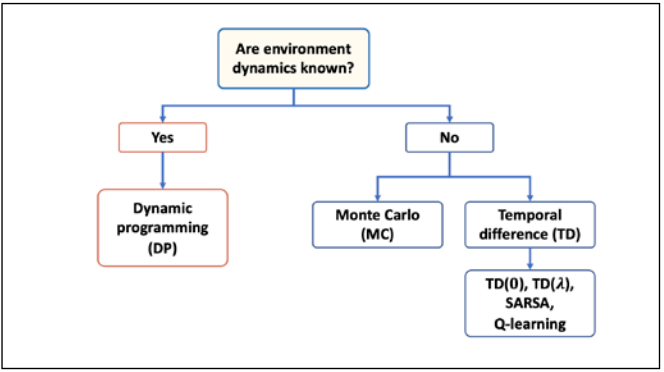

In [4]:
Image('imagens\programacao_dinamica.PNG')

A dinâmica do ambiente pode ser considerada determinística se ações particulares para determinados estados são sempre ou nunca tomadas, ou seja, $\small p(s^ \prime , r|s, a) \in \{0,1\}$. Caso contrário, no caso mais geral, o ambiente teria comportamento estocástico.

Para entender esse comportamento estocástico, vamos considerar a probabilidade de observar o estado futuro $\small S_{t+1} =s^\prime$ condicionado ao estado atual $\small S_t = s$ e a ação executada $\small A_t = a$. Isto é denotado por $\small p(s^ \prime |s, a)  \overset{def}{=} P(S_{t+1} = s^\prime|S_t = s, A_t =a)$.

Ele pode ser calculado como uma probabilidade marginal tomando a soma sobre todas as recompensas possíveis:
$$
\small p(s^ \prime |s, a)  \overset{def}{=} \sum_{r \in \hat{R}}p(s^ \prime, r|s, a)
$$

Essa probabilidade é chamada de **probabilidade de transição de estado**. Com base na probabilidade de transição de estado, se a dinâmica do ambiente for determinística, isso significa que quando o agente age $\small A_t = a$ no estado $\small S_t = s$, a transição para o próximo estado, $\small S_{t+1} = s^\prime$, será 100 por cento certo, ou seja, $\small p(s^ \prime |s, a)$ = 1.

### Visualização de um processo de Markov
Um processo de Markov pode ser representado como um grafo cíclico direcionado no qual os nós do grafo representam os diferentes estados do ambiente. As arestas do grafo (ou seja, as conexões entre os nós) representam as probabilidades de transição entre os estados.

Por exemplo, vamos considerar um aluno decidindo entre três situações diferentes: (A) estudar para uma prova em casa, (B) jogar videogame em casa ou (C) estudar na biblioteca. Além disso, há um estado terminal (T) para ir dormir. As decisões são tomadas a cada hora e, após tomar uma decisão, o aluno permanecerá em uma situação escolhida para aquela hora específica. Então, suponha que, ao ficar em casa (estado A), há uma probabilidade de 50% de que o aluno mude a atividade para jogar videogame. Por outro lado, quando o aluno está no estado B (jogando videogame), há uma chance relativamente alta (80%) de que o aluno continue jogando o videogame nas horas subsequentes.

A dinâmica do comportamento do aluno é mostrada como um processo de Markov na figura a seguir, que inclui um gráfico cíclico e uma tabela de transição:

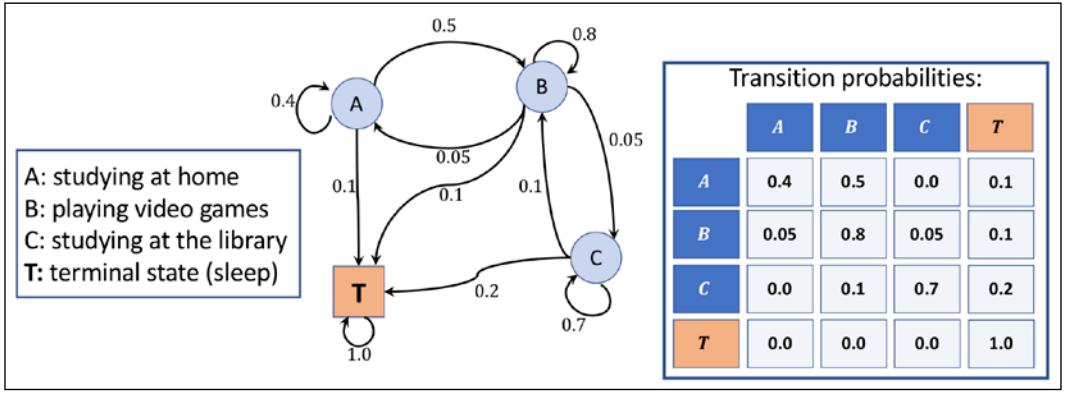

In [5]:
Image("imagens\decisoes_aluno.PNG")

Os valores nas bordas do gráfico representam as probabilidades de transição do comportamento do aluno, e seus valores também são mostrados na tabela à direita. Ao considerar as linhas na tabela, observe que as probabilidades de transição saindo de cada estado (nó) sempre somam 1.

### Tarefas episódicas versus tarefas contínuas
À medida que o agente interage com o ambiente, a sequência de observações ou estados forma uma trajetória. Existem dois tipos de trajetórias. Se a trajetória de um agente puder ser dividida em subpartes de modo que cada uma comece no tempo `t = 0` e termine em um estado terminal $\small S_T$ (em `t = T`), a tarefa é chamada de **tarefa episódica**. Por outro lado, se a trajetória é infinitamente contínua sem um estado terminal, a tarefa é chamada de **tarefa contínua**.

A tarefa relacionada a um agente de aprendizagem para o jogo de xadrez é uma tarefa episódica, enquanto um robô de limpeza que mantém uma casa arrumada normalmente executa uma tarefa contínua. Neste módulo, consideramos apenas tarefas episódicas. Em tarefas episódicas, um **episódio** é uma sequência ou trajetória que um agente leva de um estado inicial, $\small S_0$, para um estado terminal, $\small S_T$:

$$
\small S_0,A_0,R_1,S_1,A_1,R_2,\cdots, S_t,A_t,R_{t+1},\cdots, S_{T-1},A_{T-1},R_T,S_T
$$

Para o processo de Markov mostrado na figura anterior, que retrata a tarefa de um aluno estudando para um exame, podemos encontrar episódios como os três exemplos a seguir:
$$
\quad \small \text{Epis$\acute{o}$deo 1: BBCCCCBAT $\rightarrow$ passa (recompensa final = +1)}\\
\quad \quad \small \text{Epis$\acute{o}$deo 2: ABBBBBBBBBT $\rightarrow$ falha (recompensa final = -1)}\\
\small \text{Epis$\acute{o}$deo 3: BCCCCCT $\rightarrow$ passa (recompensa final = +1)}\\
$$

### Terminologia RL: retorno, política e função de valor
Em seguida, vamos definir algumas terminologias adicionais específicas de RL que precisaremos para o restante deste módulo.

### O retorno
O chamado retorno no tempo **t** é a recompensa acumulada obtida de toda a duração de um episódio. Lembre-se que $\small R_{t+1} = r$ é a **recompensa imediata** obtida após realizar uma ação, $\small A_t$, no tempo **t**; as recompensas *subsequentes* são $\small R_{t+2}$, $\small R_{t+3} e assim por diante.

O retorno no tempo t pode então ser calculado a partir da recompensa imediata, bem como das subsequentes, como segue:
$$
\small G_t  \overset{def}{=} R_{t+1} + \gamma R_{t+2}+  \gamma^2R_{t+3} + \cdots = \sum_{k=0}\gamma^kR_{t+k+1}
$$

Aqui, $\small \gamma$ é o fator de desconto no intervalo [0, 1]. O parâmetro $\small \gamma$ indica quanto as recompensas futuras *"valem"* no momento atual (tempo *t*). Observe que, definindo $\small \gamma = 0$, implicaríamos que não nos importamos com recompensas futuras. Nesse caso, o retorno será igual à recompensa imediata, ignorando as recompensas subsequentes após *t + 1*, e o agente terá um visão curta. Por outro lado, se $\small \gamma$ = 1$, o retorno será a soma não ponderada de todas as recompensas subsequentes.

Além disso, observe que a equação para o retorno pode ser expressa de maneira mais simples usando uma recursão da seguinte forma:
$$
\small G_t  = R_{t+1} + \gamma G_{t+1}= r + \gamma G_{t+1}  
$$

Isso significa que o retorno no tempo *t* é igual à recompensa imediata *r* mais o retorno futuro descontado no tempo *t + 1*. Esta é uma propriedade muito importante, que facilita os cálculos do retorno.


> ##### Intuição por trás do fator de desconto
> Para entender o fator de desconto, considere a figura a seguir que mostra o valor de ganhar uma nota de \$100 hoje comparado a ganhar daqui a um ano. Sob certas situações econômicas, como a inflação, ganhar essa nota de \$100 agora pode valer mais do que ganhá-la no futuro:

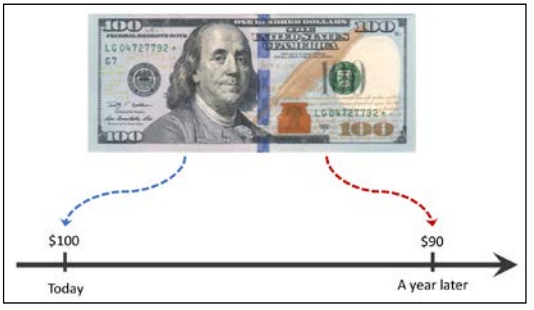

In [6]:
Image("imagens\discount_factor.PNG")

> Portanto, dizemos que se esta nota vale \$100 agora, então valeria \$90 em um ano com um fator de desconto $\small \gamma = 0.9$.

Vamos calcular o retorno em diferentes intervalos de tempo para os episódios em nosso exemplo de aluno anterior. Suponha que 𝛾𝛾 = 0,9 , e que a única recompensa dada é baseada no resultado do exame (+1 para passar no exame e -1 para reprovar). As recompensas para passos de tempo intermediários são 0.
Episódio 1: BBCCCCBAT  passe (recompensa final = +1):
• 𝑡𝑡 = 0
: 𝐺𝐺0 = 𝑅𝑅1 + 𝛾𝛾𝑅𝑅2 + 𝛾𝛾2𝑅𝑅3 + ⋯ + 𝛾𝛾6𝑅𝑅7
→
𝐺𝐺0 = 0 + 0 × 𝛾𝛾 + ⋯ + 1 × 𝛾𝛾6 = 0,96 ≈ 0,531
• 𝑡𝑡 = 1
: 𝐺𝐺1 = 1 × 𝛾𝛾5 = 0,590
• 𝑡𝑡 = 2
:𝐺𝐺2 = 1 × 𝛾𝛾4 = 0,656
• ...
• 𝑡𝑡 = 6
: 𝐺𝐺6 = 1 × 𝛾𝛾 = 0,9
• 𝑡𝑡 = 7
: 𝐺𝐺7 = 1 = 1
Episódio 2: ABBBBBBBBBT  falha (recompensa final = -1):
• 𝑡𝑡 = 0
:
𝐺𝐺0 = −1 × 𝛾𝛾8 = −0,430
• 𝑡𝑡 = 1
: 𝐺𝐺0 = −1 × 𝛾𝛾7 = −0,478
•..
• 𝑡𝑡 = 8
:
𝐺𝐺0 = −1 × 𝛾𝛾 = −0,9
• 𝑡𝑡 = 9
:
𝐺𝐺10 = -1
Deixamos o cálculo dos retornos do terceiro episódio como exercício para o leitor.
Política
Uma política tipicamente denotada por 𝜋𝜋(𝑎𝑎|𝑠𝑠) é uma função que determina a próxima ação a ser executada, que pode ser determinística ou estocástica (ou seja, a probabilidade de realizar a próxima ação). Uma política estocástica tem então uma distribuição de probabilidade sobre as ações que um agente pode realizar em um determinado estado: 𝜋𝜋(𝑎𝑎|𝑠𝑠) ≝ 𝑃𝑃[𝐴𝐴𝑡𝑡 = 𝑎𝑎 |𝑆𝑆𝑡𝑡 = 𝑠𝑠]

Durante o processo de aprendizagem, a política pode mudar à medida que o agente ganha mais experiência. Por exemplo, o agente pode partir de uma política aleatória, onde a probabilidade de todas as ações é uniforme; enquanto isso, espera-se que o agente aprenda a otimizar sua política para alcançar a política ótima. A política ótima 𝜋𝜋∗(𝑎𝑎|𝑠𝑠) é a política que produz o maior retorno.
Função de valor
A função de valor, também chamada de função de valor de estado, mede a qualidade de cada estado – em outras palavras, quão bom ou ruim é estar em um estado específico.
Observe que o critério de bondade é baseado no retorno. Agora, com base no retorno 𝐺𝐺𝑡𝑡 , definimos a função valor do estado s como o retorno esperado (o retorno médio de todos os episódios possíveis) após seguir a política 𝜋𝜋 :
𝑣𝑣𝜋𝜋 (𝑠𝑠) ≝ 𝐸𝐸𝜋𝜋 [𝐺𝐺𝑡𝑡 | 𝑆𝑆𝑡𝑡 = 𝑠𝑠] = 𝐸𝐸𝜋𝜋 [∑ 𝛾𝛾𝑘𝑘+1𝑅𝑅𝑡𝑡+𝑘𝑘+1
𝑘𝑘=0
| 𝑆𝑆𝑡𝑡 = 𝑠𝑠]
Em uma implementação real, geralmente estimamos a função de valor usando tabelas de pesquisa, portanto, não precisamos recalculá-la várias vezes. (Este é o aspecto da programação dinâmica.) Por exemplo, na prática, quando estimamos a função valor usando tais métodos tabulares, armazenamos todos os valores de estado em uma tabela denotada por V(s). Em uma implementação do Python, isso pode ser uma lista ou um array NumPy cujos índices se referem a diferentes estados; ou pode ser um dicionário Python, onde as chaves do dicionário mapeiam os estados para os respectivos valores.
Além disso, também podemos definir um valor para cada par estado-ação, que é chamado de função ação-valor e é denotado por 𝑞𝑞𝜋𝜋(𝑠𝑠, 𝑎𝑎) . A função valor-ação refere-se ao retorno esperado 𝐺𝐺𝑡𝑡 quando o agente está no estado 𝑆𝑆𝑡𝑡 = 𝑠𝑠 e realiza a ação 𝐴𝐴𝑡𝑡 = 𝑎𝑎 .
Estendendo a definição de função estado-valor para pares estado-ação, obtemos o seguinte:
𝑞𝑞𝜋𝜋 (𝑠𝑠, 𝑎𝑎) ≝ 𝐸𝐸𝜋𝜋 [𝐺𝐺𝑡𝑡 | 𝑆𝑆𝑡𝑡 = 𝑠𝑠, 𝐴𝐴𝑡𝑡 = 𝑎𝑎] = 𝐸𝐸𝜋𝜋 [∑ 𝛾𝛾𝑘𝑘+1𝑅𝑅𝑡𝑡+𝑘𝑘+1
𝑘𝑘=0
| 𝑆𝑆𝑡𝑡 = 𝑠𝑠, 𝐴𝐴𝑡𝑡 = 𝑎𝑎]
Semelhante a se referir à política ótima como 𝜋𝜋∗(𝑎𝑎|𝑠𝑠) , 𝑣𝑣∗(𝑠𝑠) e 𝑞𝑞∗(𝑠𝑠, 𝑎𝑎) também denotam as funções de valor de estado e valor de ação ideais.
Estimar a função valor é um componente essencial dos métodos RL. Abordaremos diferentes maneiras de calcular e estimar a função de valor de estado e a função de valor de ação mais adiante neste capítulo.

A diferença entre a função recompensa, retorno e valor A recompensa é uma consequência da ação do agente em relação ao estado atual do ambiente. Em outras palavras, a recompensa é um sinal que o agente recebe ao realizar uma ação de transição de um estado para outro. No entanto, lembre-se de que nem toda ação produz uma recompensa positiva ou negativa – pense no nosso exemplo de xadrez, onde uma recompensa positiva só é recebida ao vencer o jogo e a recompensa para todas as ações intermediárias é zero.